In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv
/kaggle/input/tpsdata/xg_predictions.npy
/kaggle/input/tpsdata/cat_train_oof.npy
/kaggle/input/tpsdata/cat_predictions.npy
/kaggle/input/tpsdata/lgd_predictions.npy
/kaggle/input/tpsdata/lgd_train_oof.npy
/kaggle/input/tpsdata/xg_train_oof.npy


In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
# import datasets
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2021/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2021/test.csv')
submission = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv')

In [4]:
train_df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,239479.500000,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,478959.000000,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,718438.500000,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,957918.000000,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


In [5]:
test_df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
count,4.934740e+05,485662.000000,485583.000000,485679.000000,485741.000000,485597.000000,485561.000000,485541.000000,4.856190e+05,4.856560e+05,...,485461.000000,485701.000000,485585.000000,485449.000000,485718.000000,485532.000000,485497.000000,4.853910e+05,485711.000000,485589.000000
mean,1.204656e+06,0.090191,0.346143,4047.202400,0.201503,0.304879,-0.071511,1617.036351,3.767998e+05,1.808500e+15,...,0.398130,-19.840970,2.075146,23.846392,1.762625,63051.287541,1.209049,4.284258e+16,3968.585512,0.558734
std,1.424538e+05,0.043538,0.145889,6383.224961,0.212553,0.145435,2.125074,1272.769177,3.450146e+05,2.337721e+15,...,0.297971,18.513063,0.895702,45.544851,10.096886,92279.031878,0.115074,6.743966e+16,3161.273268,0.408472
min,9.579190e+05,-0.153190,-0.019060,-9436.300000,-0.080716,-0.007007,-12.841000,-215.660000,-2.780900e+04,-1.254900e+15,...,-0.042181,-104.740000,0.261040,-23.938000,-26.311000,-81381.000000,0.900700,-7.749400e+15,-416.240000,-0.186960
25%,1.081287e+06,0.070211,0.283660,418.835000,0.035169,0.240600,-1.119500,481.820000,9.142400e+04,1.158000e+13,...,0.113300,-28.625000,1.488500,-0.624700,-4.476575,2474.875000,1.146800,2.317850e+14,1310.000000,0.276760
50%,1.204656e+06,0.090173,0.388940,1277.900000,0.137350,0.328020,-0.380190,1441.800000,2.895900e+05,5.048250e+14,...,0.357960,-14.576000,1.663100,1.730400,0.910985,19429.000000,1.177200,1.330400e+16,3237.100000,0.473790
75%,1.328024e+06,0.116507,0.458310,4421.400000,0.297160,0.412810,0.923240,2490.000000,5.596300e+05,3.106600e+15,...,0.622650,-5.318300,2.524700,18.960000,6.852075,88309.500000,1.242300,5.284700e+16,6157.300000,0.744970
max,1.451392e+06,0.412900,0.519880,39841.000000,1.310200,0.555580,11.046000,5413.100000,1.906700e+06,1.048900e+16,...,1.109400,1.464200,4.570500,217.340000,47.314000,521540.000000,1.877900,3.239500e+17,13198.000000,2.732000


In [6]:
missing_train_df = pd.DataFrame(train_df.isna().sum(axis=0))
missing_train_df = missing_train_df.drop(['id', 'claim']).reset_index()
missing_train_df.columns = ['feature', 'count']
missing_train_df['count_percent'] = missing_train_df['count']/train_df.shape[0]


missing_test_df = pd.DataFrame(test_df.isna().sum())
missing_test_df = missing_test_df.drop(['id']).reset_index()
missing_test_df.columns = ['feature', 'count']
missing_test_df['count_percent'] = missing_test_df['count']/test_df.shape[0]

In [7]:
missing_train_row = train_df.drop(['id', 'claim'], axis=1).isna().sum(axis=1)
missing_train_feature_numbers = pd.DataFrame(missing_train_row.value_counts()/train_df.shape[0]).reset_index()
missing_train_feature_numbers.columns = ['no_of_feature', 'count_percent']

missing_test_row = test_df.drop(['id'], axis=1).isna().sum(axis=1)
missing_test_feature_numbers = pd.DataFrame(missing_test_row.value_counts()/test_df.shape[0]).reset_index()
missing_test_feature_numbers.columns = ['no_of_feature', 'count_percent']

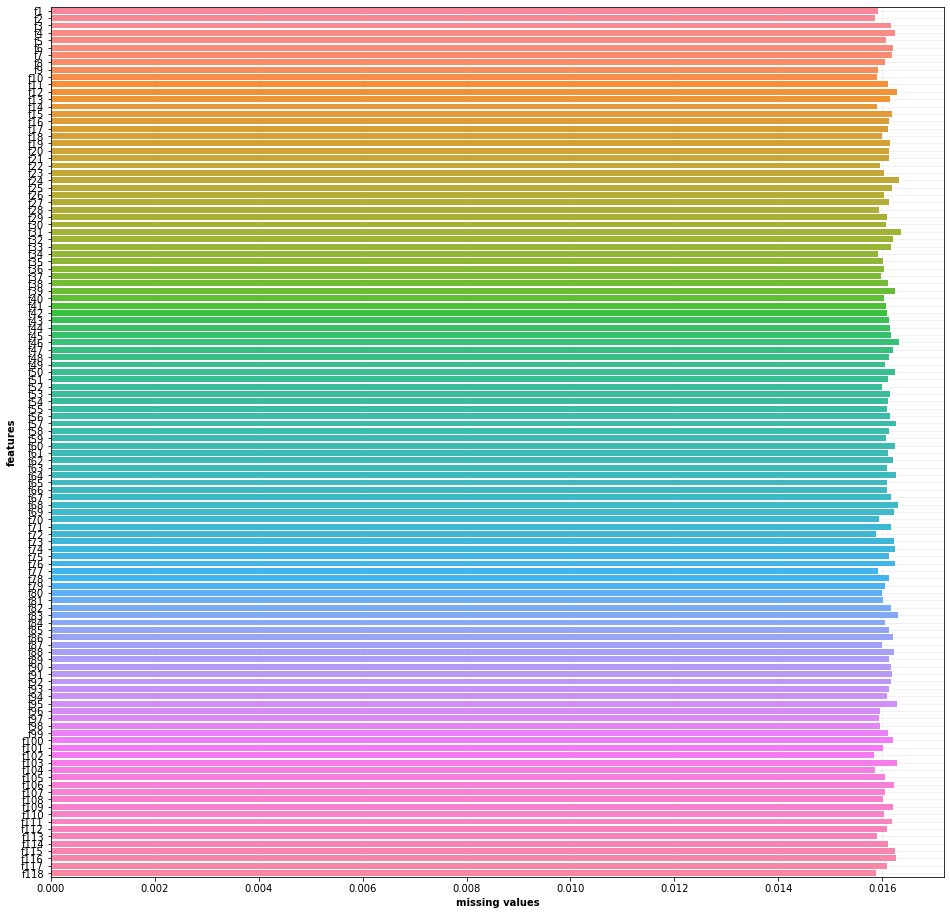

In [8]:
fig = plt.figure(figsize=(16, 16))
ax0_sns = sns.barplot(y=missing_train_df['feature'], x=missing_train_df['count_percent'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("missing values", weight='bold')
ax0_sns.set_ylabel("features", weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

See all less than 2%

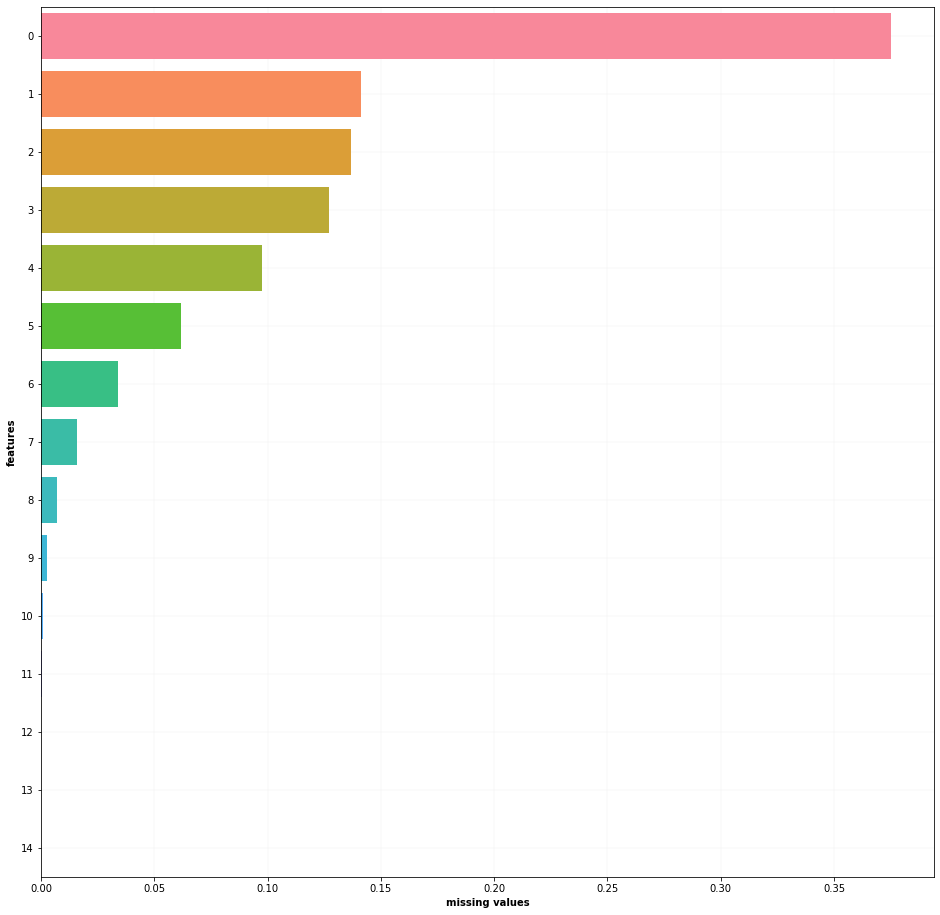

In [9]:
fig = plt.figure(figsize=(16, 16))
ax0_sns = sns.barplot(y=missing_train_feature_numbers['no_of_feature'], x=missing_train_feature_numbers['count_percent'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("missing values", weight='bold')
ax0_sns.set_ylabel("features", weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

Well can't throw the null data more than 37% 

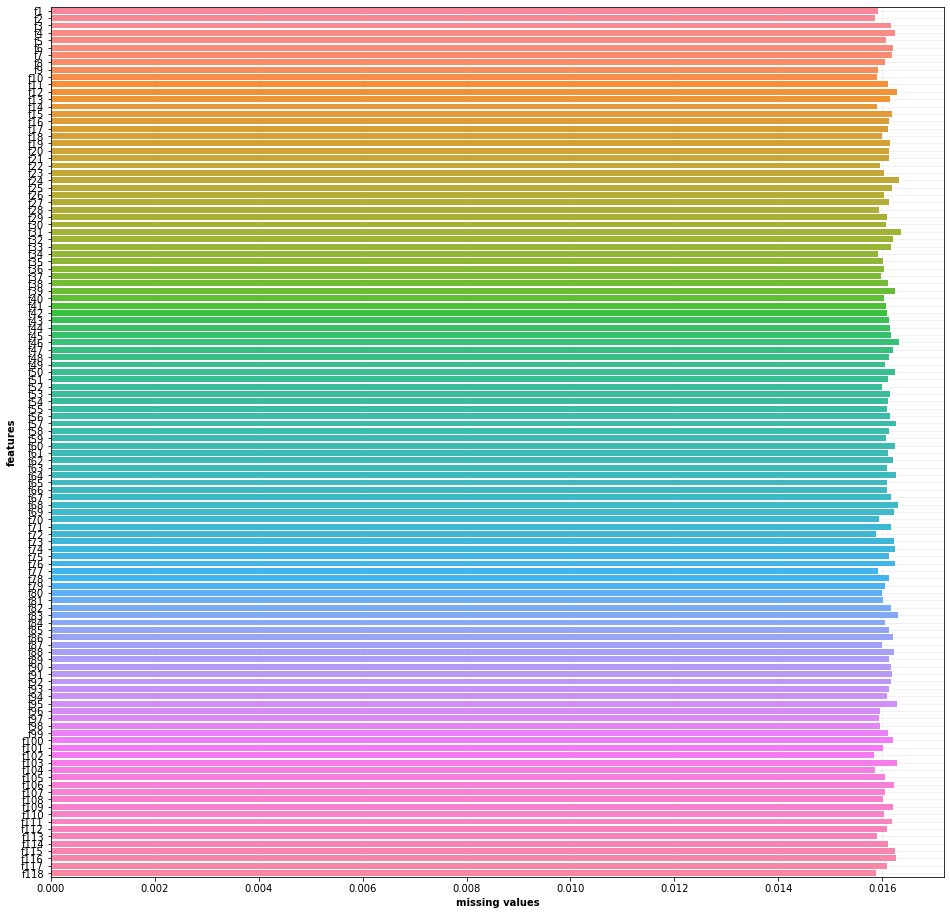

In [10]:
fig = plt.figure(figsize=(16, 16))
ax0_sns = sns.barplot(y=missing_test_df['feature'], x=missing_train_df['count_percent'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("missing values", weight='bold')
ax0_sns.set_ylabel("features", weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE')

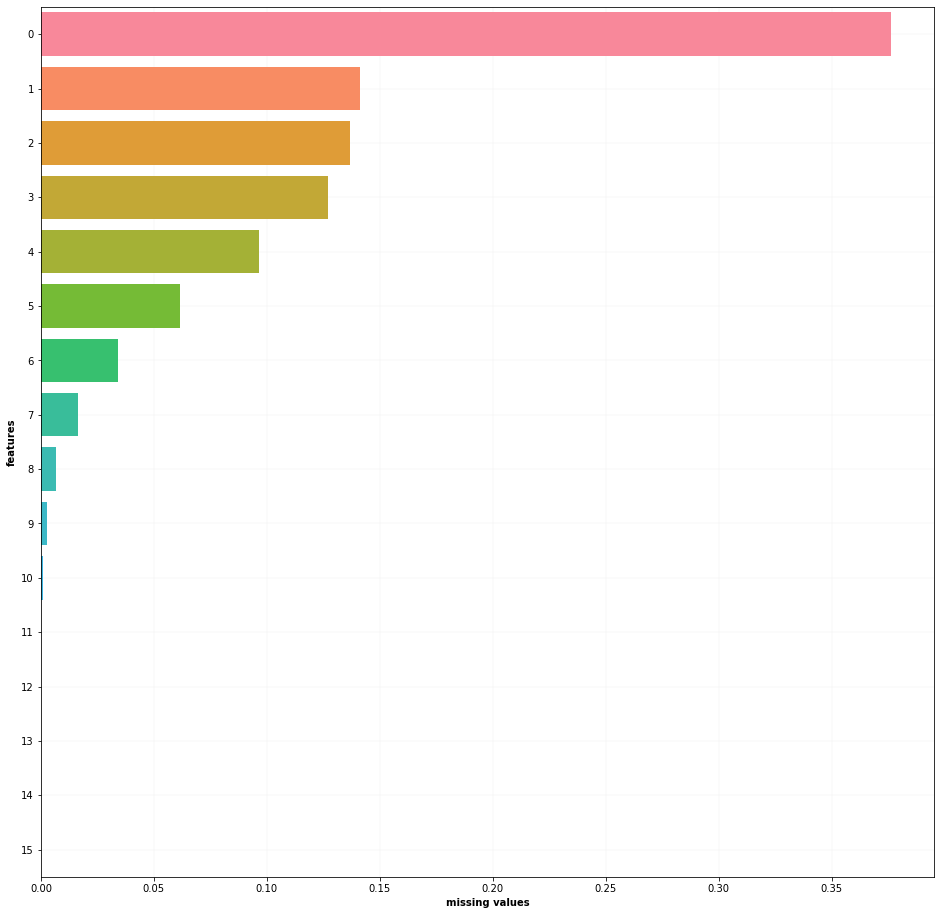

In [11]:
fig = plt.figure(figsize=(16, 16))
ax0_sns = sns.barplot(y=missing_test_feature_numbers['no_of_feature'], x=missing_test_feature_numbers['count_percent'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("missing values", weight='bold')
ax0_sns.set_ylabel("features", weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

In [12]:
train_df['num_nulls'] = train_df.drop(['id', 'claim'], axis = 1).isna().sum(axis = 1)
test_df['num_nulls'] = test_df.drop(['id'], axis = 1).isna().sum(axis = 1)

In [13]:
train_df['num_nulls'].corr(train_df['claim'])

0.452653382025988

In [14]:
train_df.claim.value_counts()

0    480404
1    477515
Name: claim, dtype: int64

Good to go. No Imbalance Class

In [15]:
from scipy.stats import skew

def impute_skewed_features(data):
    skewed_feat = data.skew()
    skewed_feat = [*skewed_feat[abs(skewed_feat.values) > 1].index]

    for feat in skewed_feat:
        median = data[feat].median()
        data[feat] = data[feat].fillna(median)
        
    return data

train_df = impute_skewed_features(train_df)
test_df = impute_skewed_features(test_df)

In [16]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer,  KBinsDiscretizer
from sklearn.impute import SimpleImputer

features = [col for col in train_df.columns if col not in ['claim', 'id']]
pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean',missing_values=np.nan)),
        ("scaler", QuantileTransformer(n_quantiles=64,output_distribution='uniform')),
        ('bin', KBinsDiscretizer(n_bins=64, encode='ordinal',strategy='uniform'))
        ])
train_df[features] = pipe.fit_transform(train_df[features])
test_df[features] = pipe.transform(test_df[features])

CPU times: user 1min 10s, sys: 5.43 s, total: 1min 15s
Wall time: 1min 15s


In [17]:
# import packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
N_SPLITS = 5
EARLY_STOPPING_ROUNDS = 200
SEED = 42
TRAINING_METHODS = {
    'XGB' : True,
    'LGDM' : True,
    'CAT' : True
}

In [19]:
def cross_validate(
    model,
    train_df,
    test_df,
    early_stopping='True'
):
    train_oof = np.zeros(len(train_df))
    predictions = np.zeros(len(test_df))

    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

    for fold, (train_idx, valid_idx) in tqdm(enumerate(skf.split(train_df.drop(['claim', 'id'],axis=1), train_df['claim']))):
        X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
        y_train = X_train['claim']
        y_valid = X_valid['claim']
        X_train = X_train.drop(['claim', 'id'], axis=1)
        X_valid = X_valid.drop(['claim', 'id'], axis=1)
        
        if early_stopping:
            model.fit(
                X_train, 
                y_train,
                eval_set=[(X_valid, y_valid)],
                early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                verbose=0
            )
        else:
            model.fit(
                X_train, 
                y_train
            )
         
        temp_oof = model.predict_proba(X_valid)[:, 1]
        train_oof[valid_idx] = temp_oof
        print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
        predictions += model.predict_proba(test_df)[:, -1] / N_SPLITS

    print(f'OOF AUC: ', roc_auc_score(train_df['claim'], train_oof))
    
    return train_oof, predictions, model    

In [20]:
test_df = test_df.drop('id', axis=1)

In [21]:
xgb_params = {
        'n_estimators': 16939, 
        'learning_rate': 0.1876042995729744, 
        'subsample': 0.9947704250490819, 
        'colsample_bytree': 0.714913373260802, 
        'max_depth': 1, 
        'min_child_weight': 300, 
        'reg_lambda': 2.520228860596293e-05, 
        'reg_alpha': 0.00045044167069949973,
        'tree_method': 'gpu_hist'
}

In [22]:
%%time
if TRAINING_METHODS['XGB']:
    xg_train_oof, xg_predictions, model = cross_validate(
                                            XGBClassifier(**xgb_params),
                                        train_df,
                                        test_df,
                                    )
    model.save_model('xgb_model')
    np.save('xg_train_oof', xg_train_oof)
    np.save('xg_predictions', xg_predictions)

0it [00:00, ?it/s]

[20:03:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold 0 AUC:  0.8155941160471778


1it [01:09, 69.01s/it]

[20:05:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold 1 AUC:  0.8164562385984663


2it [02:18, 69.26s/it]

[20:06:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold 2 AUC:  0.8156655686739759


3it [03:28, 69.77s/it]

[20:07:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold 3 AUC:  0.8156565375290791


4it [04:50, 74.32s/it]

[20:08:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold 4 AUC:  0.8148720940738308


5it [06:12, 74.50s/it]


OOF AUC:  0.8156473334981275
CPU times: user 7min 20s, sys: 4.82 s, total: 7min 25s
Wall time: 6min 13s


In [23]:
lgb_params = {
            'n_estimators': 12000, 
            'learning_rate': 0.027934730713420564, 
            'reg_alpha': 1.1799328678792862e-05, 
            'reg_lambda': 0.38585046073832296, 
            'num_leaves': 23, 
            'feature_fraction': 0.5301717514985537, 
            'bagging_fraction': 0.7745063435612487, 
            'bagging_freq': 6, 
            'min_child_samples': 19, 
            'min_child_weight': 193, 
            'colsample_bytree': 0.5145963018815463,
            "objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            "device_type" : "gpu"
}

In [24]:
%%time
if TRAINING_METHODS['LGDM']:
    lgd_train_oof, lgd_predictions, model = cross_validate(
                                            LGBMClassifier(**lgb_params),
                                        train_df,
                                        test_df,
                                    )
    np.save('lgd_train_oof', lgd_train_oof)
    np.save('lgd_predictions', lgd_predictions)
    model.booster_.save_model('lgdm_model', num_iteration=model.best_iteration_)

0it [00:00, ?it/s]

[LightGBM] [Warning] bagging_fraction is set=0.7745063435612487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7745063435612487
[LightGBM] [Warning] feature_fraction is set=0.5301717514985537, colsample_bytree=0.5145963018815463 will be ignored. Current value: feature_fraction=0.5301717514985537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Fold 0 AUC:  0.815137946619413


1it [04:45, 285.42s/it]

[LightGBM] [Warning] bagging_fraction is set=0.7745063435612487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7745063435612487
[LightGBM] [Warning] feature_fraction is set=0.5301717514985537, colsample_bytree=0.5145963018815463 will be ignored. Current value: feature_fraction=0.5301717514985537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Fold 1 AUC:  0.8163622332292388


2it [09:36, 288.97s/it]

[LightGBM] [Warning] bagging_fraction is set=0.7745063435612487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7745063435612487
[LightGBM] [Warning] feature_fraction is set=0.5301717514985537, colsample_bytree=0.5145963018815463 will be ignored. Current value: feature_fraction=0.5301717514985537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Fold 2 AUC:  0.8154400451184621


3it [13:41, 268.92s/it]

[LightGBM] [Warning] bagging_fraction is set=0.7745063435612487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7745063435612487
[LightGBM] [Warning] feature_fraction is set=0.5301717514985537, colsample_bytree=0.5145963018815463 will be ignored. Current value: feature_fraction=0.5301717514985537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Fold 3 AUC:  0.8152899013264902


4it [17:40, 256.90s/it]

[LightGBM] [Warning] bagging_fraction is set=0.7745063435612487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7745063435612487
[LightGBM] [Warning] feature_fraction is set=0.5301717514985537, colsample_bytree=0.5145963018815463 will be ignored. Current value: feature_fraction=0.5301717514985537
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Fold 4 AUC:  0.8145510591961648


5it [21:26, 257.30s/it]


OOF AUC:  0.8153500138904857
CPU times: user 40min 24s, sys: 14.8 s, total: 40min 39s
Wall time: 21min 27s


In [25]:
cat_params = {
        'iterations': 12000, 
        'objective': 'Logloss', 
        'bootstrap_type': 'Bayesian', 
        'od_wait': 1491, 
        'learning_rate': 0.07733510576652604, 
        'reg_lambda': 6.067283648607877, 
        'random_strength': 19.03761597798964, 
        'depth': 4, 
        'min_data_in_leaf': 17, 
        'leaf_estimation_iterations': 8, 
        'bagging_temperature': 0.7761781866167776,
        'task_type' : 'GPU'
}

In [26]:
%%time
if TRAINING_METHODS['LGDM']:
    cat_train_oof, cat_predictions, model = cross_validate(
                                            CatBoostClassifier(**cat_params),
                                        train_df,
                                        test_df,
                                    )
    np.save('cat_train_oof', cat_train_oof)
    np.save('cat_predictions', cat_predictions)
    model.save_model('cat_boost')


0it [00:00, ?it/s]

Fold 0 AUC:  0.8150058791756114


1it [01:27, 87.16s/it]

Fold 1 AUC:  0.8161535175530767


2it [02:04, 58.13s/it]

Fold 2 AUC:  0.8152823004307259


3it [02:37, 46.38s/it]

Fold 3 AUC:  0.8152679165315888


4it [03:11, 41.64s/it]

Fold 4 AUC:  0.8142833259559143


5it [03:50, 46.18s/it]


OOF AUC:  0.8151956351412143
CPU times: user 4min 22s, sys: 1min 19s, total: 5min 42s
Wall time: 3min 51s


In [27]:
cols = ["lgb", "xgb", "cat"]
df_oof = pd.DataFrame(
    dict(
        zip(cols, [lgd_train_oof, xg_train_oof, cat_train_oof])
    )
)
df_pred = pd.DataFrame(
    dict(
        zip(cols, [lgd_predictions, xg_predictions, cat_predictions])
    )
)

In [28]:
df_oof['claim'] = train_df['claim']
df_oof['id'] = df_oof.index

In [29]:
params = {"objective": "binary", "metric": "binary_logloss", "random_state": SEED, "device_type" : "gpu", 'verbose':0, "n_estimators" : 2000} 
oof_lgb2, pred_lgb2, _ = cross_validate(
    LGBMClassifier(**params),
    df_oof,
    df_pred
)

params = {"objective": "binary:logistic", "random_state": SEED, 'tree_method': 'gpu_hist', 'verbose':0, 'n_estimators': 2000}
oof_xgb2, pred_xgb2, _ = cross_validate(
    XGBClassifier(**params),
    df_oof,
    df_pred
)

params = {"random_state": SEED, 'task_type': 'GPU', 'verbose':0, 'iterations': 2000}
oof_cat2, pred_cat2, _ = cross_validate(
    CatBoostClassifier(**params),
    df_oof, 
    df_pred
)

params = {"random_state": SEED, 'n_jobs': -1 , 'C':1000, 'max_iter':1000}
oof_log2, pred_log2, _ = cross_validate(
    LogisticRegression(**params), 
    df_oof,
    df_pred,
    early_stopping=False
)


0it [00:00, ?it/s]

Fold 0 AUC:  0.8155778755704556


1it [00:17, 17.24s/it]

Fold 1 AUC:  0.8166684355210696


2it [00:28, 13.91s/it]

Fold 2 AUC:  0.8157991745292283


3it [00:40, 12.73s/it]

Fold 3 AUC:  0.8157669018359253


4it [00:52, 12.47s/it]

Fold 4 AUC:  0.8149764939203579


5it [01:03, 12.69s/it]


OOF AUC:  0.8157085823250303


0it [00:00, ?it/s]

[20:36:27] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1it [00:01,  1.46s/it]

Fold 0 AUC:  0.8155117984201581
[20:36:29] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [00:02,  1.38s/it]

Fold 1 AUC:  0.8164907761071821
[20:36:30] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3it [00:04,  1.35s/it]

Fold 2 AUC:  0.8156391615387302
[20:36:31] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


4it [00:05,  1.33s/it]

Fold 3 AUC:  0.8155759157891274
[20:36:32] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


5it [00:06,  1.34s/it]

Fold 4 AUC:  0.8148146917613646


OOF AUC:  0.815549334195049


0it [00:00, ?it/s]

Fold 0 AUC:  0.8156882235303519


1it [00:07,  7.06s/it]

Fold 1 AUC:  0.8168355713680283


2it [00:14,  7.23s/it]

Fold 2 AUC:  0.8159430471408274


3it [00:20,  6.85s/it]

Fold 3 AUC:  0.8159084144383737


5it [00:31,  6.38s/it]

Fold 4 AUC:  0.8150149529177225


OOF AUC:  0.8158359057937437


1it [00:03,  3.63s/it]

Fold 0 AUC:  0.815794768154405


2it [00:06,  3.18s/it]

Fold 1 AUC:  0.8168366602928481


3it [00:09,  2.88s/it]

Fold 2 AUC:  0.8159430489389918


4it [00:12,  3.02s/it]

Fold 3 AUC:  0.8159251357333809


5it [00:14,  2.99s/it]

Fold 4 AUC:  0.8151272339287606


OOF AUC:  0.8159198689901482


In [30]:
ensemble_predictions = np.array([pred_lgb2, pred_xgb2, pred_cat2, pred_log2]).mean(axis=0)

In [31]:
ensemble_predictions

array([0.5717611 , 0.12923972, 0.62545081, ..., 0.75189004, 0.14970636,
       0.74437372])

In [32]:
submission['claim'] = ensemble_predictions.tolist()
submission.to_csv('submission.csv', index=False)